# Homework 2
### Charles Yan, xy2985

### Q1 OLS

In [1]:
### Packages
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### (a)
### Let T = 5, N = 3
T, N = 5, 3
X = np.random.normal(0, 1, (T, N))

In [3]:
### Test
print(X)

[[-2.36651489 -1.14643865 -1.28739531]
 [ 1.09064813 -0.73597227  0.50847266]
 [-0.49232899  2.41713131  0.71683355]
 [ 0.02560789 -0.59911648 -0.39261225]
 [ 0.1060536  -0.56261811  0.1290649 ]]


In [4]:
### (b)
def linmodel(X, beta, std):
    if X.shape[1] != beta.shape[0]:
        print('Dimension Mismatch')
        return None
    residual = np.random.normal(0, std, X.shape[0])
    return X @ beta + residual

In [5]:
### Test
beta = np.random.normal(0, 1, (N, ))
std = 0.5
y = linmodel(X, beta, std)
print(y)

[ 2.58524988  1.46717823 -4.38123568  0.96442001  0.84365188]


In [6]:
### (c)
def fit(X, y):
    if X.shape[0] != y.shape[0]:
        print('Dimension Mismatch')
        return None
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [7]:
### Test
print(fit(X, y))
### Compare
print(f'True parameter: beta\n{beta}')

[-0.28303452 -1.96296517  0.31177252]
True parameter: beta
[-0.1637642  -1.64127541  0.23029537]


In [8]:
### (d)
T, N = 1000, 3
X = np.random.normal(0, 1, (T, N))

std_list = [0.01, 0.1, 1]
beta = np.array([0.01, 0.1, 1])

for std in std_list:
    y = linmodel(X, beta, std)
    beta_hat = fit(X, y)
    print(f'Standard Devisation: {std};\nEstimated beta: {beta_hat}\n******************************')

Standard Devisation: 0.01;
Estimated beta: [0.01023694 0.0999179  0.99961107]
******************************
Standard Devisation: 0.1;
Estimated beta: [0.01025442 0.09943295 1.00306536]
******************************
Standard Devisation: 1;
Estimated beta: [0.08218285 0.0792236  1.01124978]
******************************


In [ ]:
### (e)
### See the scan of the clarification.

In [9]:
### (f)
K = 100
X = np.random.normal(0, 1, (T, N))

for std in std_list:
    beta_hat_list = []
    for _ in range(K):
        y = linmodel(X, beta, std)
        beta_hat = fit(X, y)
        beta_hat_list.append(beta_hat)
    beta_hat_list = np.array(beta_hat_list)
    print(f'Standard Devisation: {std};\nStandard Deviation of Estimated beta:\n{beta_hat_list.std(axis = 0)}\n******************************')


Standard Devisation: 0.01;
Standard Deviation of Estimated beta:
[0.0003245  0.00033112 0.00027712]
******************************
Standard Devisation: 0.1;
Standard Deviation of Estimated beta:
[0.00326963 0.00372617 0.00324786]
******************************
Standard Devisation: 1;
Standard Deviation of Estimated beta:
[0.03405232 0.03257172 0.03249791]
******************************


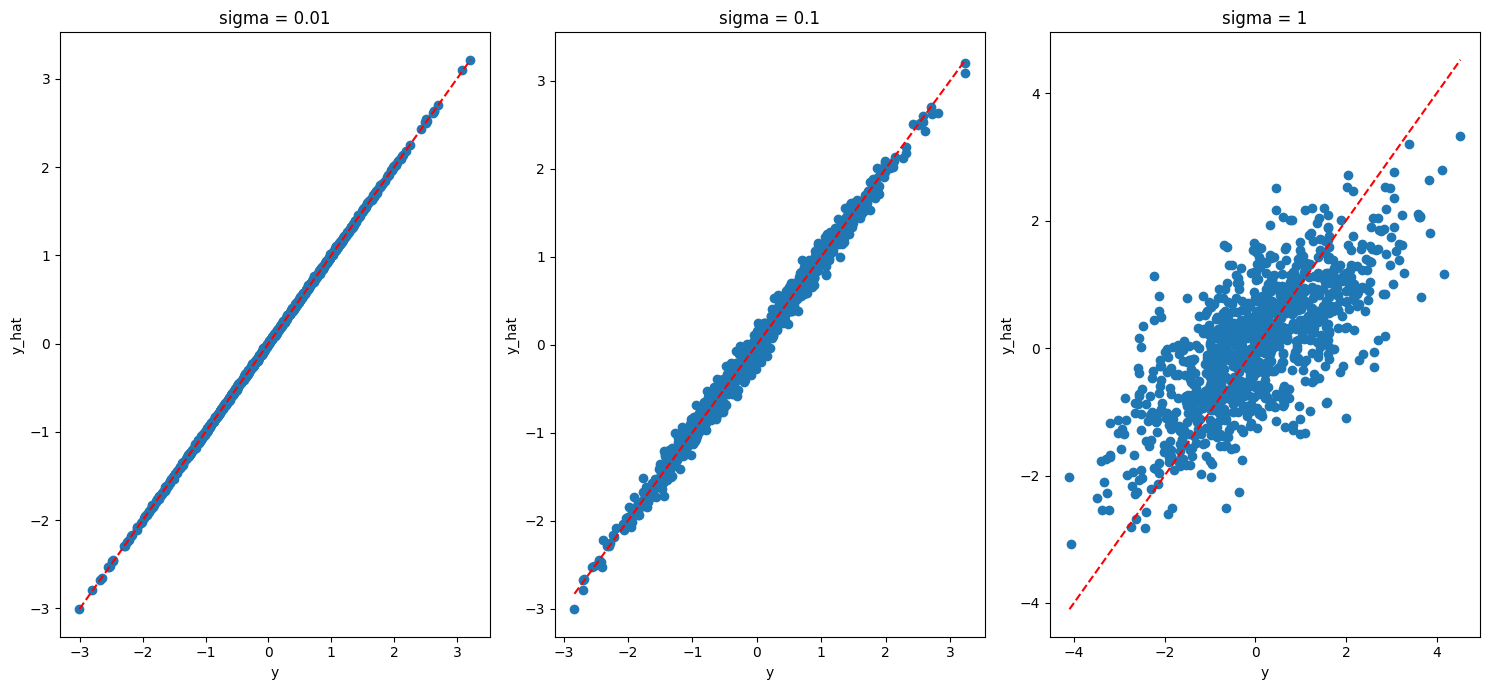

In [10]:
### (g)
fig, axes = plt.subplots(1, 3, figsize = (15, 7))

for i, std in enumerate(std_list):
    y = linmodel(X, beta, std)
    beta_hat = fit(X, y)
    y_hat = X @ beta_hat

    axes[i].scatter(y, y_hat)
    axes[i].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    axes[i].set_xlabel('y')
    axes[i].set_ylabel('y_hat')
    axes[i].set_title(f'sigma = {std}')

plt.tight_layout()
plt.show()

#### Explanation
#####

In [11]:
### (h)
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [14]:
T, N = 1000, 3
X = np.random.normal(0, 1, (T, N))

def scatter(std, beta_1, beta_2, beta_3):
    if (beta_1 < 0 or beta_1 > 1) or (beta_2 < 0 or beta_2 > 1) or (beta_3 < 0 or beta_3 > 1):
        print('Beta values should be in [0, 1].')
        return
    

    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])

    beta = np.array([beta_1, beta_2, beta_3])
    y = linmodel(X, beta, std)
    beta_hat = fit(X, y)
    y_hat = X @ beta_hat

    ax.scatter(y, y_hat, alpha = 0.3, s = 10, c = 'steelblue')
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth = 2)
    ax.set_xlabel('y')
    ax.set_ylabel('y_hat')
    ax.set_title(f'std = {std:.2f}, beta = {np.round(beta, 2)}')

    plt.show()

    return beta_hat

w = widgets.interactive(scatter, std = (0.0, 1.0, 0.01), beta_1 = (0.0, 1.0, 0.01), beta_2 = (0.0, 1.0, 0.01), beta_3 = (0.0, 1.0, 0.01))
display(w)

interactive(children=(FloatSlider(value=0.5, description='std', max=1.0, step=0.01), FloatSlider(value=0.5, de…

### Q2 OLS in Geometry

### (a) Proof


In [15]:
### (b)
import numpy as np

X = np.random.normal(0, 1, (T, N))

##### 1. By definition, $P = X(X^{\top}X)^{-1}X^{\top}$. We can construct such an equation, $X^{\top}XA = X^{\top}$. Thus, $np.linalg.solve(\cdot, \cdot)$ will compute $(X^{\top}X)^{-1}$ first and then multiply by $X^{\top}$ to solve the equation,
##### i.e. $A = (X^{\top}X)^{-1}X^{\top}$. Finally, compute $P$ by let $X$ multiply by A.

In [ ]:
### (1)
A = np.linalg.solve(X.T @ X, X.T)
P = X @ A
M = np.eye(T) - P

### Test
print('=' * 45)
print('Projection Matrix P:\n', P)
print('=' * 45)
print('Annihilator Matrix M:\n', M)
print('=' * 45)

Projection Matrix P:
 [[ 1.03793706e-03  2.60988858e-04 -1.79503596e-03 ... -7.48129556e-04
  -3.55649180e-04  2.44557566e-04]
 [ 2.60988858e-04  2.96414403e-04  3.20692434e-06 ...  1.33520334e-04
   3.48668266e-04  1.21200997e-04]
 [-1.79503596e-03  3.20692434e-06  4.70396238e-03 ...  2.62722716e-03
   5.55564956e-04 -7.72291231e-04]
 ...
 [-7.48129556e-04  1.33520334e-04  2.62722716e-03 ...  1.68303831e-03
  -4.97792300e-05 -5.57117596e-04]
 [-3.55649180e-04  3.48668266e-04  5.55564956e-04 ... -4.97792300e-05
   2.16158028e-03  6.41125423e-04]
 [ 2.44557566e-04  1.21200997e-04 -7.72291231e-04 ... -5.57117596e-04
   6.41125423e-04  3.82675170e-04]]
Annihilator Matrix M:
 [[ 9.98962063e-01 -2.60988858e-04  1.79503596e-03 ...  7.48129556e-04
   3.55649180e-04 -2.44557566e-04]
 [-2.60988858e-04  9.99703586e-01 -3.20692434e-06 ... -1.33520334e-04
  -3.48668266e-04 -1.21200997e-04]
 [ 1.79503596e-03 -3.20692434e-06  9.95296038e-01 ... -2.62722716e-03
  -5.55564956e-04  7.72291231e-04]
 ...

##### 2. Frobenius Norm as a distance is applied, in order to scale the similarity between matrices, i.e. the equality below.

In [22]:
### (2)
def check_equality(A, B, tol = 1e-6):
    if A.shape != B.shape:
        print('Dimension Mismatch')
        return None
    return np.linalg.norm(A - B) <= tol
### Verify P = P^T 
P_Sym = check_equality(P, P.T)
### Verify P = PP
P_Ide = check_equality(P, P @ P)
### Verify M = MM
M_Ide = check_equality(M, M @ M)

### Test
print('=' * 45)
print(f'P = P^T: {P_Sym}')
print('=' * 45)
print(f'P = PP: {P_Ide}')
print('=' * 45)
print(f'M = MM: {M_Ide}')
print('=' * 45)


P = P^T: True
P = PP: True
M = MM: True


In [ ]:
### (3)



In [ ]:
### (4)